# Image analize

In [1]:
from PIL import Image
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
img_G = mpimg.imread('mdb001.pgm') # Type G
img_D = mpimg.imread('mdb003.pgm') # Type D
img_F = mpimg.imread('mdb005.pgm') # Type F

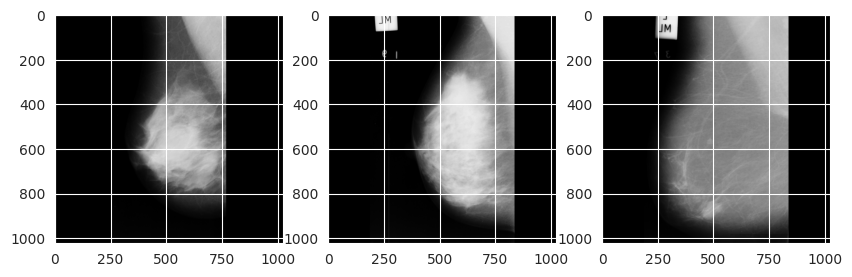

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [7]:
def kmeans_filter(img, k):
    vectorized = img.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(vectorized)
    
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    
    segmented_image = segmented_data.reshape((img.shape))
    return segmented_image

In [8]:
k = 3

segmented_img_G = kmeans_filter(img_G, k) # Type G
segmented_img_D = kmeans_filter(img_D, k) # Type D
segmented_img_F = kmeans_filter(img_F, k) # Type F

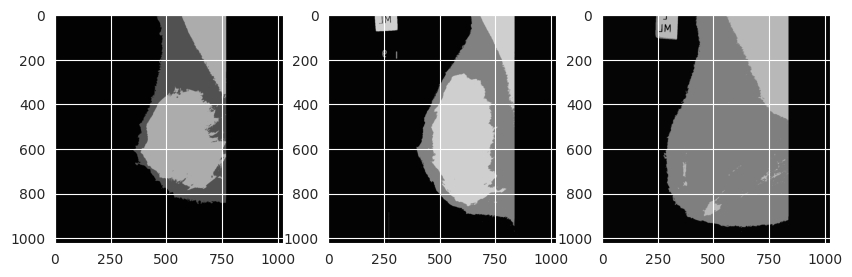

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(segmented_img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(segmented_img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(segmented_img_F, cmap='gray', vmin=0, vmax=255)
plt.show()